<a href="https://colab.research.google.com/github/MMAdatawiz/MLprojects/blob/ANN/mymnistcnnann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

read mnist, create a function which takes this data splits it into test and train

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


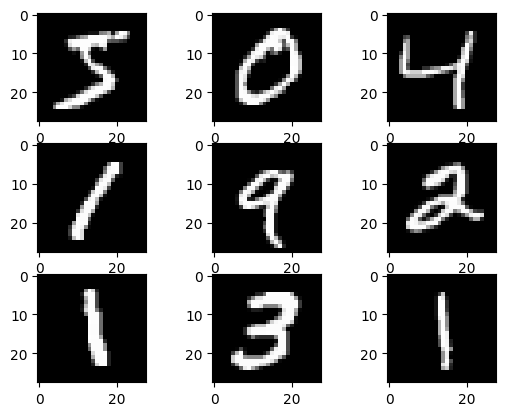

In [ ]:

# Display some images
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()


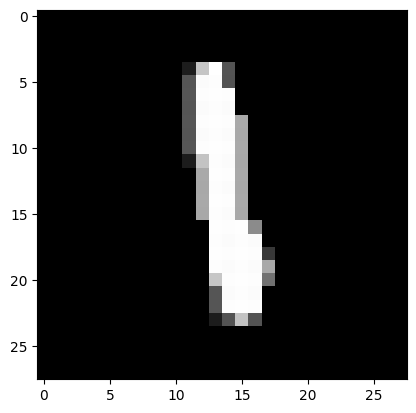

In [ ]:
plt.imshow(x_train[200], cmap='gray')
plt.show()

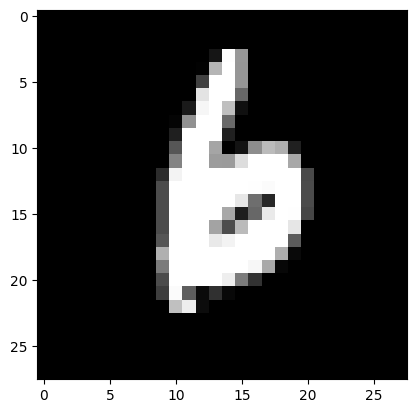

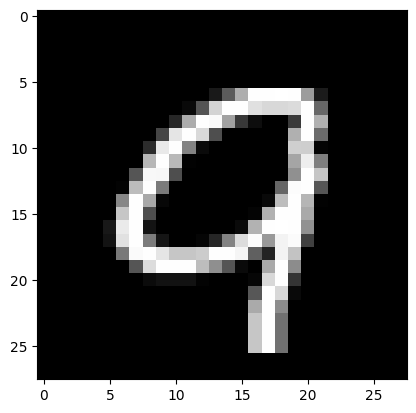

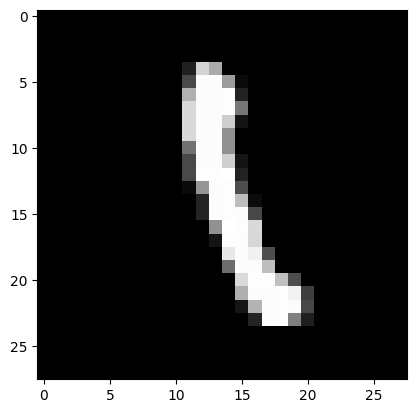

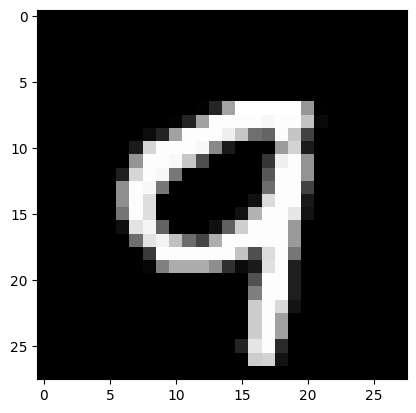

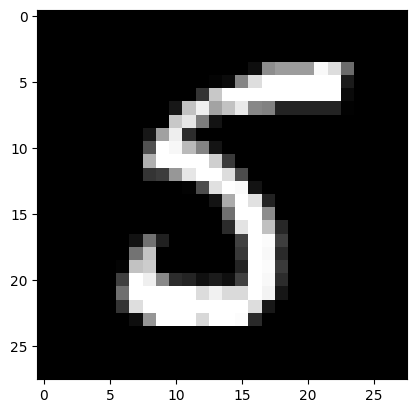

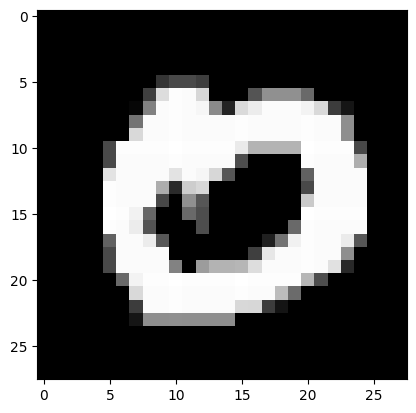

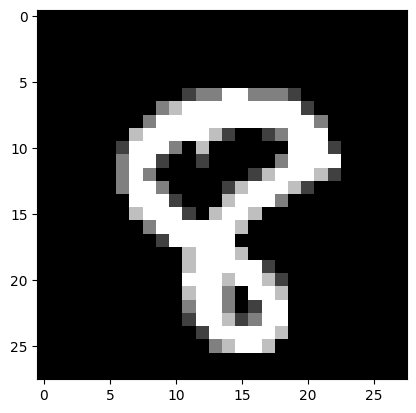

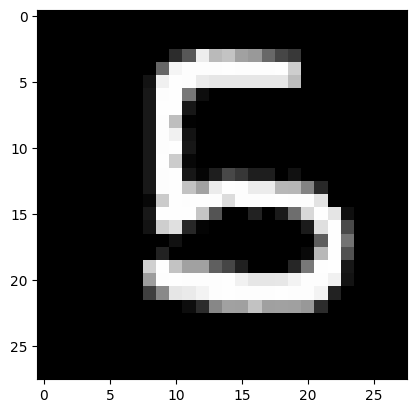

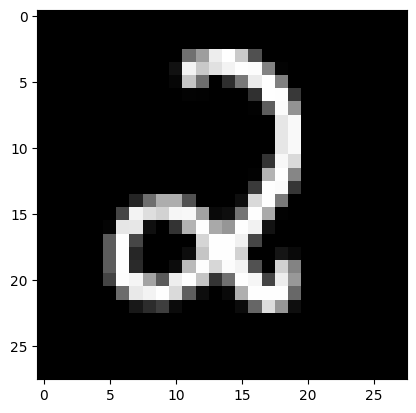

In [ ]:
random_indices=np.random.randint(0, x_train.shape[0], 9)
for i in random_indices:
  plt.imshow(x_train[i], cmap='gray')
  plt.show()

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# prompt: build an ann model using this mnist dataset along with the use of minmaxscaler

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Flatten the images
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# Scale the pixel values to be between 0 and 1
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_flattened)
x_test_scaled = scaler.transform(x_test_flattened)

# Build the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(x_test_scaled, y_test))


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2425 - accuracy: 0.9297 - val_loss: 0.1217 - val_accuracy: 0.9623
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1040 - accuracy: 0.9678 - val_loss: 0.1081 - val_accuracy: 0.9645
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0717 - accuracy: 0.9782 - val_loss: 0.0979 - val_accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0546 - accuracy: 0.9822 - val_loss: 0.0806 - val_accuracy: 0.9738
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 0.0816 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.0962 - val_accuracy: 0.9702
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0275 - accuracy: 0.9907 - val_loss: 0.0786 - val_accuracy

In [ ]:
numrows=28
numcols=28

x_train=x_train.reshape((x_train.shape[0], numrows * numcols))
x_test=x_test.reshape((x_test.shape[0], numrows * numcols))

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255

In [ ]:
model=Sequential()
model.add(Dense(64, activation='relu', input_shape=(numrows*numcols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3360 - accuracy: 0.9003 - val_loss: 0.1589 - val_accuracy: 0.9529
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1405 - accuracy: 0.9574 - val_loss: 0.1180 - val_accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1029 - accuracy: 0.9690 - val_loss: 0.1144 - val_accuracy: 0.9646
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9740 - val_loss: 0.0970 - val_accuracy: 0.9708
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0690 - accuracy: 0.9789 - val_loss: 0.0979 - val_accuracy: 0.9690
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.1037 - val_accuracy: 0.9710
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0513 - accuracy: 0.9836 - val_loss: 0.0891 - val_accuracy:

In [ ]:
model=Sequential()
model.add(Dense(64, activation='relu', input_shape=(numrows*numcols, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1856      
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 16)                528       
                                                                 
Total params: 4464 (17.44 KB)
Trainable params: 4464 (17.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.utils import to_categorical

In [ ]:
y_test=to_categorical(y_test, 10)
y_train=to_categorical(y_train, 10)

In [ ]:
print(y_train[0])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0461 - accuracy: 0.9851 - val_loss: 0.1102 - val_accuracy: 0.9718
Epoch 2/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0372 - accuracy: 0.9876 - val_loss: 0.1296 - val_accuracy: 0.9669
Epoch 3/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.1133 - val_accuracy: 0.9716
Epoch 4/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0325 - accuracy: 0.9891 - val_loss: 0.1197 - val_accuracy: 0.9701
Epoch 5/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.1175 - val_accuracy: 0.9726
Epoch 6/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.0306 - accuracy: 0.9899 - val_loss: 0.1442 - val_accuracy: 0.9678
Epoch 7/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.1220 - val_accuracy

In [ ]:
from keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(Dense(64, activation='relu', input_shape=(numrows*numcols, )))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_46 (Dense)            (None, 10)              

In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
3000/3000 [==============================] - 11s 3ms/step - loss: 0.6240 - accuracy: 0.8053 - val_loss: 0.1900 - val_accuracy: 0.9471
Epoch 2/10
3000/3000 [==============================] - 11s 4ms/step - loss: 0.3224 - accuracy: 0.9112 - val_loss: 0.1610 - val_accuracy: 0.9551
Epoch 3/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2702 - accuracy: 0.9258 - val_loss: 0.1406 - val_accuracy: 0.9600
Epoch 4/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2441 - accuracy: 0.9345 - val_loss: 0.1218 - val_accuracy: 0.9653
Epoch 5/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2233 - accuracy: 0.9399 - val_loss: 0.1255 - val_accuracy: 0.9661
Epoch 6/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2096 - accuracy: 0.9423 - val_loss: 0.1202 - val_accuracy: 0.9683
Epoch 7/10
3000/3000 [==============================] - 9s 3ms/step - loss: 0.2041 - accuracy: 0.9443 - val_loss: 0.1191 - val_accurac

In [ ]:
# prompt: help me build a cnn model

from keras.layers import Conv2D, MaxPooling2D

# Reshape data for CNN (assuming images are 28x28)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_49 (Dense)            (None, 128)             

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


In [ ]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)